In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

In [2]:
# defining sampling frequency, time step and time vector
fs = 100
dt = 1/fs
t = np.arange(0,5,dt)#0:1/fs:5-1/fs;
nt = len(t)
print(nt)


500


In [3]:
# Defining a simple function to analyse
fun1 = np.linspace(0,0,nt)

# changing to equaly spaced delta function
for n in range(nt):
    if n%2 == 0:
        fun1[n] = 1
#print(fun1)

# introducing the transient function
trans1 = np.linspace(0,0,nt)
trans1[nt//2] = 3

trans1[250]

fun2 = fun1 + trans1

######## introducing more complex transient
# random indeces with transient
xt = [421,128,408,122,465,175,99,126,309,237,176,416,293,275,459,143,379,377,191,284]
# random transient values
tr =[2,4,4,5,3,3,5,2,3,2,4,2,3,4,5,5,3,2,4,2]

trans2 = np.linspace(0,0,nt)

for nn in range(len(xt)):
    kk = xt[nn]
    trans2[kk] = tr[nn]
    
fun3 = fun1 + trans2  


# function with some random noise added
fun4 = fun3 + 1.2 *(np.random.rand(fun2.size)) 


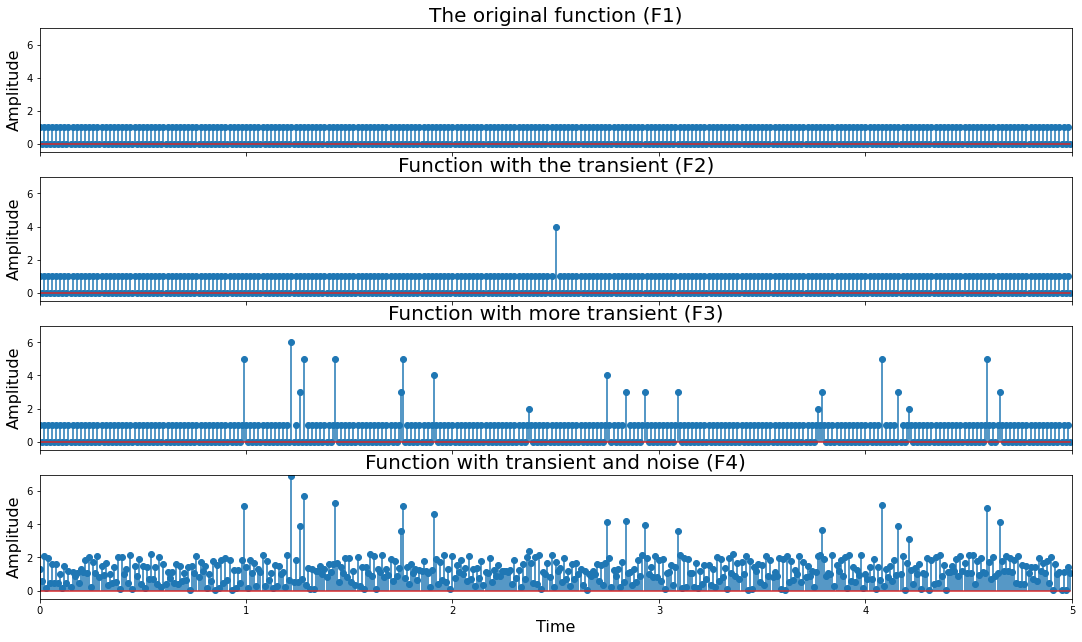

In [4]:
# Plotting the signal
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True, sharex='col')
axes = plt.gca()
axes.set_ylim([-0.5,7])
axes.set_xlim([0,5])
fig.set_size_inches(18.5, 10.5, forward=True)

ax1.stem(t,fun1)
ax1.set_ylabel('Amplitude', fontsize=16)
ax1.set_title('The original function (F1)', fontsize=20)

ax2.stem(t,fun2)
ax2.set_ylabel('Amplitude', fontsize=16)
ax2.set_title('Function with the transient (F2)', fontsize=20)

ax3.stem(t,fun3)
ax3.set_ylabel('Amplitude', fontsize=16)
ax3.set_title('Function with more transient (F3)', fontsize=20)

ax4.stem(t,fun4)
ax4.set_ylabel('Amplitude', fontsize=16)
ax4.set_title('Function with transient and noise (F4)', fontsize=20)
ax4.set_xlabel('Time', fontsize=16)

fig.savefig("/Users/mathis/Desktop/ANIA MESS/PhD/work/Testing/report/images/function.eps")

In [5]:
# Setting STA/LTA parameters

LTA = 40
STA = 4
trig = 1.5
PEM = 10

range(nt)

# Creating empty vectors for STA and LTA
STA1 = np.linspace(0,0,nt)
STA2 = np.linspace(0,0,nt)
STA3 = np.linspace(0,0,nt)
STA4 = np.linspace(0,0,nt)
LTA1 = np.linspace(0,0,nt)
LTA2 = np.linspace(0,0,nt)
LTA3 = np.linspace(0,0,nt)
LTA4 = np.linspace(0,0,nt)
ratio1 = np.linspace(0,0,nt)
ratio2 = np.linspace(0,0,nt)
ratio3 = np.linspace(0,0,nt)
ratio4 = np.linspace(0,0,nt)

In [6]:
'''
for k in range(len(fun1)-STA):
    STA1[k+STA] = np.mean(abs(fun1[k:(STA+k)]))
    STA2[k+STA] = np.mean(abs(fun2[k:(STA+k)]))
    STA3[k+STA] = np.mean(abs(fun3[k:(STA+k)]))
'''

'\nfor k in range(len(fun1)-STA):\n    STA1[k+STA] = np.mean(abs(fun1[k:(STA+k)]))\n    STA2[k+STA] = np.mean(abs(fun2[k:(STA+k)]))\n    STA3[k+STA] = np.mean(abs(fun3[k:(STA+k)]))\n'

In [7]:
# Simple case of detecting the treshold

# loop for STA
for k in range(len(fun1)-STA):
    STA1[k] = np.mean(abs(fun1[k:(STA+k)]))
    STA2[k] = np.mean(abs(fun2[k:(STA+k)]))
    STA3[k] = np.mean(abs(fun3[k:(STA+k)]))
    STA4[k] = np.mean(abs(fun4[k:(STA+k)]))
# loop for LTA
for k in range(len(fun1)-LTA):
    LTA1[k] = np.mean(abs(fun1[k:(LTA+k)]))
    LTA2[k] = np.mean(abs(fun2[k:(LTA+k)]))
    LTA3[k] = np.mean(abs(fun3[k:(LTA+k)]))
    LTA4[k] = np.mean(abs(fun4[k:(LTA+k)]))
# loop for ratio
for k in range(len(fun1)-LTA):
    ratio1[k+LTA] = STA1[k+LTA-STA] / LTA1[k]
    ratio2[k+LTA] = STA2[k+LTA-STA] / LTA2[k]
    ratio3[k+LTA] = STA3[k+LTA-STA] / LTA3[k]
    ratio4[k+LTA] = STA4[k+LTA-STA] / LTA4[k]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


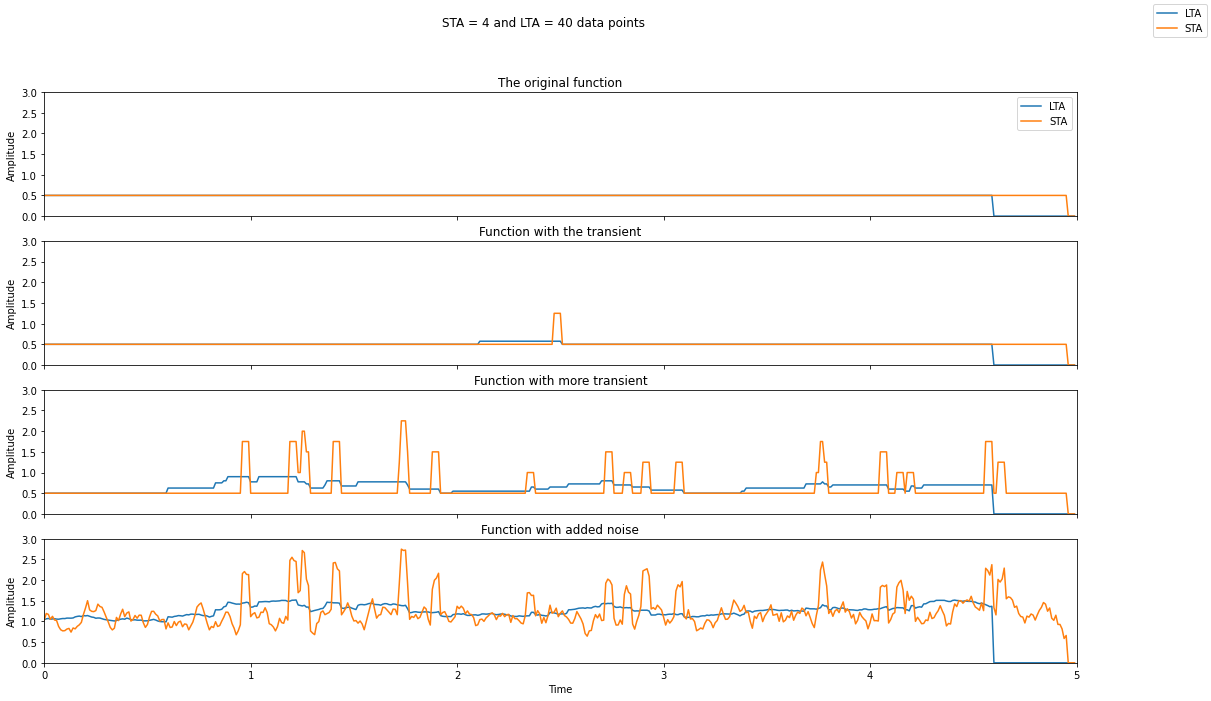

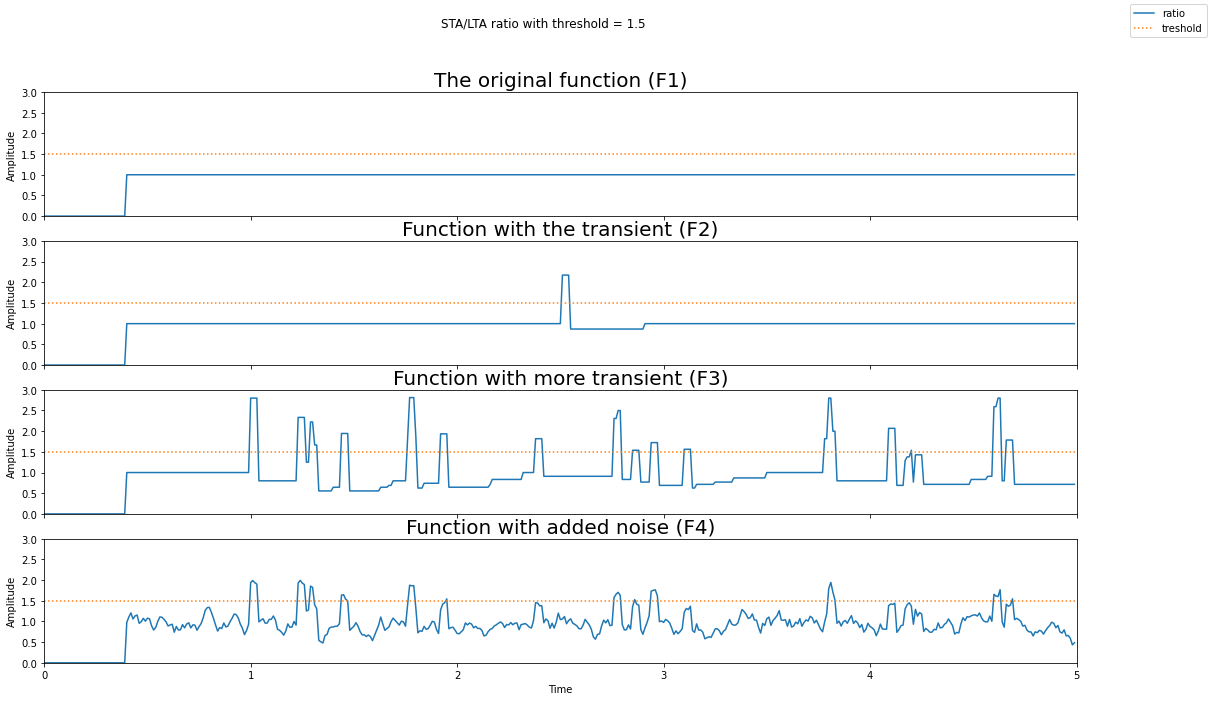

In [8]:
# Plotting the STA, LTA and ratios

# STA LTA plots
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, sharey=True, sharex='col')
axes = plt.gca()
axes.set_ylim([0,3])
axes.set_xlim([0,5])
fig.set_size_inches(18.5, 10.5)
fig.suptitle("STA = {} and LTA = {} data points".format(STA,LTA))



ax1.plot(t,LTA1,label='LTA')
ax1.plot(t,STA1,label='STA')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.set_title('The original function')

ax2.plot(t,LTA2,label='LTA')
ax2.plot(t,STA2,label='STA')
ax2.set_ylabel('Amplitude')
ax2.set_title('Function with the transient')

ax3.plot(t,LTA3,label='LTA')
ax3.plot(t,STA3,label='STA')
ax3.set_ylabel('Amplitude')
ax3.set_title('Function with more transient')

ax4.plot(t,LTA4,label='LTA')
ax4.plot(t,STA4,label='STA')
ax4.set_ylabel('Amplitude')
ax4.set_title('Function with added noise')
ax4.set_xlabel('Time')

lines, labels = axes.get_legend_handles_labels()#
fig.legend(lines, labels, loc = 'upper right')

fig.savefig("/Users/mathis/Desktop/ANIA MESS/PhD/work/Testing/report/images/STALTA.eps")

# ratio plots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True, sharex='col')
axes = plt.gca()
axes.set_ylim([0,3])
axes.set_xlim([0,5])
fig.set_size_inches(18.5, 10.5, forward=True)
fig.suptitle("STA/LTA ratio with threshold = {}".format(trig))

ax1.plot(t,ratio1, label='ratio')
ax1.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
ax1.set_ylabel('Amplitude')
ax1.set_title('The original function (F1)', fontsize=20)

ax2.plot(t,ratio2, label='ratio')
ax2.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
ax2.set_ylabel('Amplitude')
ax2.set_title('Function with the transient (F2)', fontsize=20)

ax3.plot(t,ratio3, label='ratio')
ax3.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
ax3.set_ylabel('Amplitude')
ax3.set_title('Function with more transient (F3)', fontsize=20)

ax4.plot(t,ratio4, label='ratio')
ax4.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
ax4.set_ylabel('Amplitude')
ax4.set_title('Function with added noise (F4)', fontsize=20)
ax4.set_xlabel('Time')

lines, labels = axes.get_legend_handles_labels()#
fig.legend(lines, labels, loc = 'upper right')

fig.savefig("/Users/mathis/Desktop/ANIA MESS/PhD/work/Testing/report/images/ratio.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


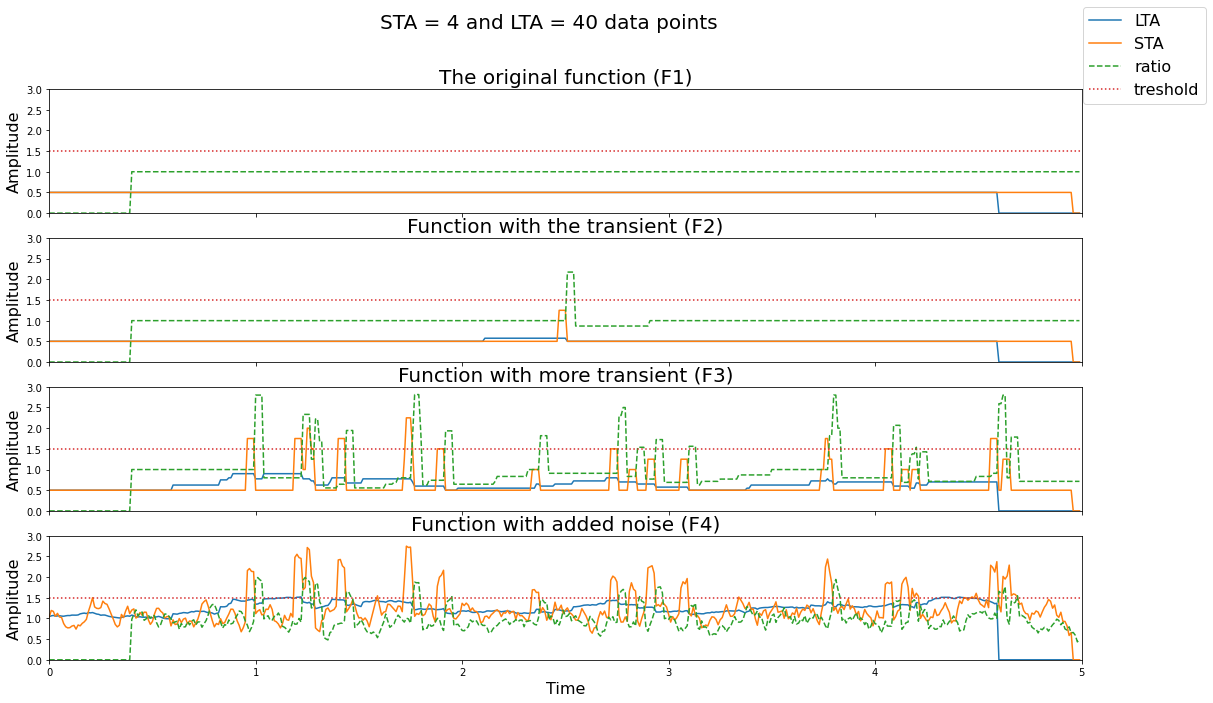

In [9]:
# Plotting the STA, LTA and ratios together

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharey=True, sharex='col')
axes = plt.gca()
axes.set_ylim([0,3])
axes.set_xlim([0,5])
fig.set_size_inches(18.5, 10.5)
fig.suptitle("STA = {} and LTA = {} data points".format(STA,LTA), fontsize=20)



ax1.plot(t,LTA1,label='LTA')
ax1.plot(t,STA1,label='STA')
ax1.plot(t,ratio1,linestyle='dashed', label='ratio')
ax1.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
ax1.set_ylabel('Amplitude', fontsize=16)
ax1.set_title('The original function (F1)', fontsize=20)

ax2.plot(t,LTA2,label='LTA')
ax2.plot(t,STA2,label='STA')
ax2.plot(t,ratio2,linestyle='dashed', label='ratio')
ax2.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
ax2.set_ylabel('Amplitude', fontsize=16)
ax2.set_title('Function with the transient (F2)', fontsize=20)

ax3.plot(t,LTA3,label='LTA')
ax3.plot(t,STA3,label='STA')
ax3.plot(t,ratio3,linestyle='dashed', label='ratio')
ax3.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
ax3.set_ylabel('Amplitude', fontsize=16)
ax3.set_title('Function with more transient (F3)', fontsize=20)

ax4.plot(t,LTA4,label='LTA')
ax4.plot(t,STA4,label='STA')
ax4.plot(t,ratio4,linestyle='dashed', label='ratio')
ax4.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
ax4.set_ylabel('Amplitude', fontsize=16)
ax4.set_title('Function with added noise (F4)', fontsize=20)
ax4.set_xlabel('Time', fontsize=16)

lines, labels = axes.get_legend_handles_labels()#
fig.legend(lines, labels, loc = 'upper right', fontsize=16)

fig.savefig("/Users/mathis/Desktop/ANIA MESS/PhD/work/Testing/report/images/together.eps")



In [10]:
# Stationary and transient separation
numbers1=[]
numbers2 = []
numbers3 =[]
numbers4 =[]
aa = 0
for kk in range(len(ratio1)):
    if ratio1[kk] >= trig and ratio1[kk-1] <= trig:
        numb = kk
        numbers1 += numb
        aa += 1
        
bb = 0
for kk in range(len(ratio2)):
    if ratio2[kk] >= trig and ratio2[kk-1] <= trig:
        numb2 = kk
        print(kk)
        numbers2.append(numb2)
        bb += 1
cc = 0
for kk in range(len(ratio3)):
    if ratio3[kk] >= trig and ratio3[kk-1] <= trig:
        numb3 = kk
        numbers3.append(numb3)
        cc += 1
dd = 0
for kk in range(len(ratio4)):
    if ratio4[kk] >= trig and ratio4[kk-1] <= trig:
        numb4 = kk
        numbers4.append(numb4)
        dd += 1

251


In [11]:
trans2 = np.linspace(0,0,nt)
stat2 = np.linspace(0,0,nt)
trans3 = np.linspace(0,0,nt)
stat3 = np.linspace(0,0,nt)
trans4 = np.linspace(0,0,nt)
stat4 = np.linspace(0,0,nt)

# FUN2 a loop for extracting the whole vecotr data for stationary and transient parts of the signal

i = 0
kk = 0

while kk <= nt-1:
    #print(kk)
    if kk + PEM <= nt-1:
        # case when there is only one peak
        if len(numbers2) == 1:
            if ratio2[kk+PEM] >= trig and ratio2[kk+PEM-1] <= trig:
                while kk < numbers2[i]+PEM:
                    trans2[kk] = fun2[kk]
                    stat2[kk] = 0
                    kk = kk + 1
            else:
                stat2[kk] = fun2[kk]
                trans2[kk] = 0
                kk = kk + 1
        elif i+1 > len(numbers2):
            while kk <= nt:
                stat2[kk] = fun2[kk]
                trans2[kk] = 0
                kk = kk + 1
        else:
            if ratio2[kk+PEM] >= trig and ratio2[kk+PEM-1] <= trig:
                while kk < numbers2[i]+PEM:
                    trans2[kk] = fun2[kk]
                    stat2[kk] = 0
                    kk = kk + 1 
                # dopoki numbers(i+1)+pem < kk 
                if i+1 <= len(numbers2):
                    if numbers2[i+1]-PEM <= kk:
                        while numbers2[i+1]-PEM <= kk:
                            # dopoki
                            while kk < numbers2[i+1]+PEM:
                                trans2[kk] = fun2[kk]
                                stat2[kk] = 0
                                kk = kk + 1
                            i = i + 1
                            #jesli tak, to do konca numbers(i+1)+Pem - transient
                            if i+1 > len(numbers2):
                                break
                    else:
                        i = i + 1
                        # jesli nie, idziemy dalej normlanie
                else:
                    stat2[kk] = fun2[kk]
                    trans2[kk] = 0
                    kk = kk + 1
            else:
                stat2[kk] = fun2[kk]
                trans2[kk] = 0
                kk = kk + 1
    else:
        stat2[kk] = fun2[kk]
        trans2[kk] = 0
        kk = kk + 1               

In [12]:
# FUN3 -  a loop for extracting the whole vecotr data for stationary and transient parts of the signal 

i = 0
kk = 0

while kk <= nt-1:
    #print(kk)
    if kk + PEM <= nt-1:
        # case when there is only one peak
        if len(numbers3) == 1:
            if ratio3[kk+PEM] >= trig and ratio3[kk+PEM-1] <= trig:
                while kk < numbers3[i]+PEM:
                    trans3[kk] = fun3[kk]
                    stat3[kk] = 0
                    kk = kk + 1
            else:
                stat3[kk] = fun3[kk]
                trans3[kk] = 0
                kk = kk + 1
        elif i > len(numbers3):
            while kk <= nt:
                stat3[kk] = fun3[kk]
                trans3[kk] = 0
                kk = kk + 1
        else:
            if ratio3[kk+PEM] >= trig and ratio3[kk+PEM-1] <= trig:
                while kk < numbers3[i]+PEM:
                    trans3[kk] = fun3[kk]
                    stat3[kk] = 0
                    kk = kk + 1 
                # dopoki numbers(i+1)+pem < kk 
                if i <= len(numbers3):
                    if numbers3[i]-PEM <= kk:
                        while numbers3[i]-PEM <= kk:
                            # dopoki
                            while kk < numbers3[i]+PEM:
                                trans3[kk] = fun3[kk]
                                stat3[kk] = 0
                                kk = kk + 1
                            i = i + 1
                            #jesli tak, to do konca numbers(i+1)+Pem - transient
                            if i+1 > len(numbers3):
                                break
                    else:
                        i = i + 1
                        # jesli nie, idziemy dalej normlanie
                else:
                    stat3[kk] = fun3[kk]
                    trans3[kk] = 0
                    kk = kk + 1
            else:
                stat3[kk] = fun3[kk]
                trans3[kk] = 0
                kk = kk + 1
    else:
        stat3[kk] = fun3[kk]
        trans3[kk] = 0
        kk = kk + 1 

In [13]:
# FUN4 -  a loop for extracting the whole vecotr data for stationary and transient parts of the signal 

i = 0
kk = 0

while kk <= nt-1:
    #print(kk)
    if kk + PEM <= nt-1:
        # case when there is only one peak
        if len(numbers4) == 1:
            if ratio4[kk+PEM] >= trig and ratio4[kk+PEM-1] <= trig:
                while kk < numbers4[i]+PEM:
                    trans4[kk] = fun4[kk]
                    stat4[kk] = 0
                    kk = kk + 1
            else:
                stat4[kk] = fun4[kk]
                trans4[kk] = 0
                kk = kk + 1
        elif i > len(numbers4):
            while kk <= nt:
                stat4[kk] = fun4[kk]
                trans4[kk] = 0
                kk = kk + 1
        else:
            if ratio4[kk+PEM] >= trig and ratio4[kk+PEM-1] <= trig:
                while kk < numbers4[i]+PEM:
                    trans4[kk] = fun4[kk]
                    stat4[kk] = 0
                    kk = kk + 1 
                # dopoki numbers(i+1)+pem < kk 
                if i <= len(numbers4):
                    if numbers4[i]-PEM <= kk:
                        while numbers4[i]-PEM <= kk:
                            # dopoki
                            while kk < numbers4[i]+PEM:
                                trans4[kk] = fun4[kk]
                                stat4[kk] = 0
                                kk = kk + 1
                            i = i + 1
                            #jesli tak, to do konca numbers(i+1)+Pem - transient
                            if i+1 > len(numbers4):
                                break
                    else:
                        i = i + 1
                        # jesli nie, idziemy dalej normlanie
                else:
                    stat4[kk] = fun4[kk]
                    trans4[kk] = 0
                    kk = kk + 1
            else:
                stat4[kk] = fun4[kk]
                trans4[kk] = 0
                kk = kk + 1
    else:
        stat4[kk] = fun4[kk]
        trans4[kk] = 0
        kk = kk + 1 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


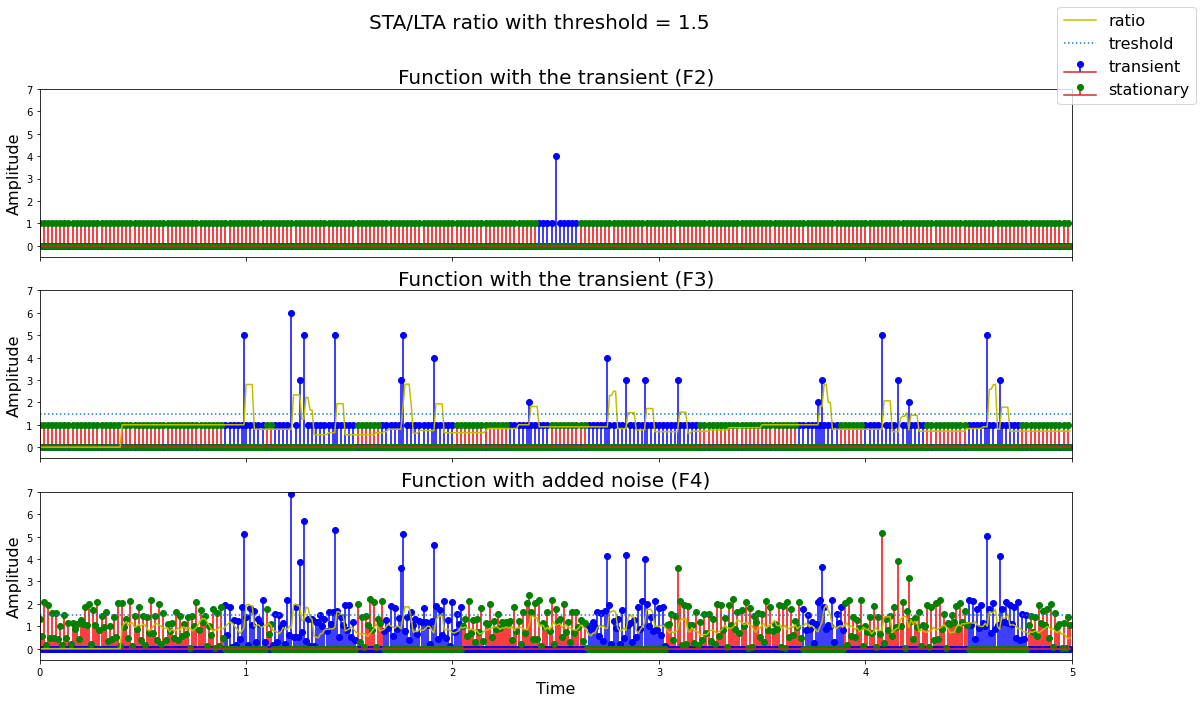

In [14]:
# plotting the transient and stationary parts

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, sharex='col')
axes = plt.gca()
axes.set_ylim([-0.5,7])
axes.set_xlim([0,5])
fig.set_size_inches(18.5, 10.5, forward=True)
fig.suptitle("STA/LTA ratio with threshold = {}".format(trig), fontsize=20)

ax1.stem(t,trans2,'b', markerfmt='bo', label='transient')
ax1.stem(t,stat2,'r', markerfmt='go', label='stationary')
ax1.set_ylabel('Amplitude', fontsize=16)
ax1.set_title('Function with the transient (F2)', fontsize=20)

ax2.stem(t,trans3,'b', markerfmt='bo', label='transient')
ax2.stem(t,stat3,'r', markerfmt='go', label='stationary')
ax2.plot(t,ratio3,'y', label='ratio')
ax2.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
ax2.set_ylabel('Amplitude', fontsize=16)
ax2.set_title('Function with the transient (F3)', fontsize=20)

ax3.stem(t,trans4,'b', markerfmt='bo', label='transient')
ax3.stem(t,stat4,'r', markerfmt='go', label='stationary')
ax3.plot(t,ratio4,'y', label='ratio')
ax3.plot([0,5],[trig,trig],linestyle='dotted',label='treshold')
ax3.set_ylabel('Amplitude', fontsize=16)
ax3.set_title('Function with added noise (F4)', fontsize=20)
ax3.set_xlabel('Time', fontsize=16)


lines, labels = axes.get_legend_handles_labels()#
fig.legend(lines, labels, loc = 'upper right', fontsize=16)
fig.savefig("/Users/mathis/Desktop/ANIA MESS/PhD/work/Testing/report/images/statrans.eps")

In [15]:
count = 0
for kk in range(len(xt)):
    i_tr = xt[kk]  # index of transient
    v_tr = fun4[i_tr] # value of function in a given transient 
    if v_tr == trans4[i_tr]:
        count += 1     # counting how much calculated transient values fit the function
    print(count)
    print('this is transient value',trans4[i_tr],'and this is in function',v_tr,'. DOdajemy: count=',count )
# calculating the percentage of fit
fit_perc = count/len(xt)
    
print('total fit percentage is ',fit_perc*100,'%')
len(xt)

0
this is transient value 0.0 and this is in function 3.1334451374040793 . DOdajemy: count= 0
1
this is transient value 5.709476398477059 and this is in function 5.709476398477059 . DOdajemy: count= 1
1
this is transient value 0.0 and this is in function 5.151788697792958 . DOdajemy: count= 1
2
this is transient value 6.9090964744565095 and this is in function 6.9090964744565095 . DOdajemy: count= 2
3
this is transient value 4.1237821391461775 and this is in function 4.1237821391461775 . DOdajemy: count= 3
4
this is transient value 3.591955726970061 and this is in function 3.591955726970061 . DOdajemy: count= 4
5
this is transient value 5.113345405095207 and this is in function 5.113345405095207 . DOdajemy: count= 5
6
this is transient value 3.888838378289691 and this is in function 3.888838378289691 . DOdajemy: count= 6
6
this is transient value 0.0 and this is in function 3.595997902284223 . DOdajemy: count= 6
6
this is transient value 0.0 and this is in function 2.3947209574944974 .

20

In [16]:
t[191]

1.9100000000000001

In [17]:
xt = [421,128,408,122,465,175,99,126,309,237,176,416,293,275,459,143,379,377,191,284]